<a href="https://colab.research.google.com/github/mereosk/Gradient_Descent/blob/main/%CE%9C%CE%B5%CF%81%CE%B5%CF%8C%CF%82_1115201700085.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question 1
###Operations with Vectors and Arrays


We will create two arrays with integer values $X \in \mathbb{Z}^{3\times4}$, $Y \in \mathbb{Z}^{4\times3}$

Also we shall create two vectors with integer values $a \in \mathbb{Z}^4$, $b \in \mathbb{Z}^4$

In [ ]:
import numpy as np

# Random seed that is produced by my student id
np.random.seed(85)

# Creating the two arrays
array_X = np.random.randint(1,10,(3,4)) # random numpy array of shape (3,4)
print("First array", array_X)

array_Y = np.random.randint(1,10,(4,3)) # random numpy array of shape (4,3)
print("Second array", array_Y)

# Creating the two vectors
vector_a = np.random.randint(1,10,(4)) # random numpy vector of shape (1,4)
print("First vector", vector_a)

vector_b = np.random.randint(1,10,(4)) # random numpy vector of shape (1,4)
print("Second vector", vector_b)

First array [[1 5 4 5]
 [4 6 2 9]
 [4 8 7 7]]
Second array [[1 8 8]
 [2 7 2]
 [4 7 3]
 [6 5 3]]
First vector [3 4 1 1]
Second vector [1 6 3 9]


##Exercise 1.1

###Calculate the dot product of the vectors $a$ and $b$, like this $a^\intercal b$


$<a,b> \doteq a^\intercal b \in 	\mathbb{R} = \begin{pmatrix} x1 &x2 &x3 &x4 \end{pmatrix} \begin{pmatrix} y1 \\ y2 \\ y3 \\y4 \end{pmatrix} = \sum_{i=0}^D xiyi $


##Solution


 $\begin{pmatrix} 3 &4 &1 &1 \end{pmatrix} \begin{pmatrix} 1 \\ 6 \\ 3 \\9 \end{pmatrix} = 3*1 + 6*4 + 1*3 + 1*9 = 39 $

In [ ]:
# Calculate the dot product of vector a and b
dot_product=np.inner(vector_a, vector_b)
print("The dot product of", vector_a,"and",vector_b,"is",dot_product)

The dot product of [3 4 1 1] and [1 6 3 9] is 39


##Exercise 1.2

###Calculate the product of the array with vector $Xa\in \mathbb{Z}^3$

##Solution

$\begin{pmatrix} 1 &5 &4 &5 \\ 4 &6 &2 &9 \\4 &8 &7 &7 \end{pmatrix} \begin{pmatrix} 3 \\4 \\1 \\1  \end{pmatrix} = \begin{pmatrix} 3+20+4+5 &12+24+2+9 &12+32+7+7  \end{pmatrix} = \begin{pmatrix} 32 &47 &58  \end{pmatrix} \in \mathbb{Z}^3$

In [ ]:
# Calculate the product of the array X and the vector a
product = array_X.dot(vector_a.T)
print("The product of the multiplication of the array",array_X,"with the vector",vector_a,"is",product)

The product of the multiplication of the array [[1 5 4 5]
 [4 6 2 9]
 [4 8 7 7]] with the vector [3 4 1 1] is [32 47 58]


##Exercise 1.3

###Calculate the product of the arrays $XY\in \mathbb{Z}^{3\times3}$

##Solution

$\begin{pmatrix} 1 &5 &4 &5 \\ 4 &6 &2 &9 \\4 &8 &7 &7 \end{pmatrix}\begin{pmatrix} 1 &8 &8 \\ 2 &7 &2 \\4 &7 &3 \\6 &5 &3  \end{pmatrix} = \begin{pmatrix} 1+10+16+30 &8+35+28+25 &8+10+12+15 \\ 4+12+8+52 &32+42+14+45 &32+12+6+21 \\4+16+28+42 &32+56+49+35 &32+16+21+21 \end{pmatrix} = \begin{pmatrix} 57 &96 &45 \\ 78 &133 &77 \\90 &172 &90 \end{pmatrix}$

In [ ]:
# Calculate the product of the arrays XY
productArrays = array_X.dot(array_Y)
print("The product of the multiplication of the array X with the array Y is", productArrays)

The product of the multiplication of the array X with the array Y is [[ 57  96  45]
 [ 78 133  77]
 [ 90 172  90]]


##Exercise 1.4

###Calculate the norm of the vector a

##Solution

$\|a\|2 = (\sum_{i=0} |ai|^2)^\frac{1}{2}$

$\|a\|2 = (3^2+4^2+1^2+1^2)^\frac{1}{2} = (9+16+1+1)^\frac{1}{2} = 27^\frac{1}{2} = 5.196152422706632$

In [ ]:
# Calculate the norm of the vector a
norm=np.linalg.norm(vector_a)
print("norm",norm)

norm 5.196152422706632


#Question 2
###Calculating derivatives

##Exercise 2

$f(X) := ||A-XB||_{\text{F}}^2 = \mbox{tr}((A-XB)(A-XB)^{\top})$


$=  \mbox{tr}((A-XB)(A^{\top} - B^{\top}X^{\top})) = \mbox{tr}(AA^{\top}-XBA^{\top}-AB^{\top}X^{\top}+XBB^{\top}X^{\top})$

From the cookboox we find that

$\nabla f(X)=  -(BA^{\top})^{\top}-AB^{\top}+BBX+(BB^{\top})^{\top}X$

$\nabla f(X)=  (AB^{\top}-AB^{\top}+BB^{\top}X+BB^{\top}X $

$\nabla f(X)=  -2AB^{\top}+2BB^{\top}X$


BUT we want 


$\nabla f(X)=  0$

so that we can find the global minima of the equation

$-2AB^{\top}+2BB^{\top}X = 0$

$X=AB^{\top}$

#Question 3
###Gradient descent

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

In [ ]:
from sympy import *

def gradient_descent_2Vars(function, curX, curY, rate, iterations, precision, flag_precision, print_values):

  function_values = []

  # This is the partial derivative with respect to x
  derivativeX = diff(function, x)

  # This is the partial derivative with respect to y
  derivativeY = diff(function, y)
  counter = 0

  for i in range(iterations):

    temp_curX = curX - rate*N(derivativeX.subs(x,curX).subs(y,curY)).evalf()
    temp_curY = curY - rate*N(derivativeY.subs(y,curY).subs(x,curX)).evalf()
    # print(f"x {curX} and temp_curX {temp_curX}")

    if flag_precision:
      # If the values of x and y change less of the precision, we met our goal
      if abs(temp_curY-curY) < precision and abs(temp_curX-curX) < precision:
        print("The local minimum occurs at", curX, ", ", curY)
        break

    # Update the values
    curX = temp_curX
    curY = temp_curY

    if print_values:
      print(N(function.subs(x,curX).subs(y,curY)).evalf())
    function_values.append(N(function.subs(x,curX).subs(y,curY)).evalf())
    counter+=1

  return function_values, counter

Below I implement the first question in which I execute the algorithm gradient descent for the functions:

$f_1([x,y]^\intercal) = f_1(x,y) = (x-2)^2+(y-3)^2\\f_2([x,y]^\intercal) = f_2(x,y) = (1-(y-3))^2+20((x-3)-(y-3)^2)^2$

Firstly, I run it with learning rate = 0.5, iteration = 10 and the initialization of x, y will be 0

0
0
0
0
0
0
0
0
0
0


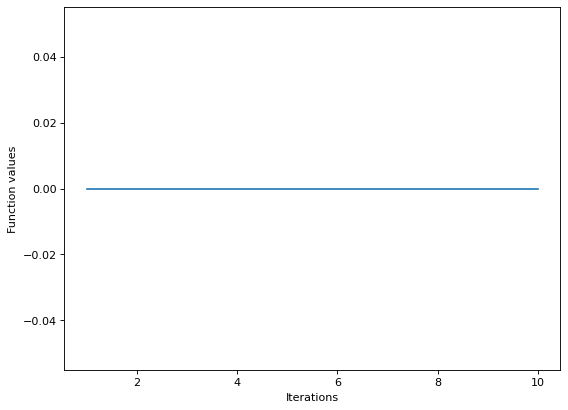

In [ ]:
# f1 function

x = Symbol('x')
y = Symbol('y')

curX = 0                # The algorithm starts at x=0
curY = 0               # The algorithm starts at y=0
rate = 0.5              # Learning rate
precision = 0.0001      # This tells us when to stop the algorithm
maxIters = 10         # Maximum number of iterations
precision_reached = False  # If this flag is true then the loop stops at a certain precision       


f1 = (x-2)**2 + (y-3)**2
# first_function = (1-(y-3))**2 + 20*((x+3)-(y-3)**2)**2
f_values, iter_counter = gradient_descent_2Vars(f1, curX, curY, rate, maxIters, precision, precision_reached, True)

x = np.arange(1, iter_counter+1)
y = f_values
figure(figsize=(10, 4), dpi=80)
plt.plot(x, y)


# Add Axes Labels
plt.ylabel("Function values") 
plt.xlabel("Iterations") 

plt.show()

The observation is that the f1 function, with these values, converges to 0. Also is converges instantly with the learning rate being 0.5.

5402136508880.00
1.00944358810678e+42
6.58303456372108e+129
1.82582176549974e+393
3.89542739261895e+1183
3.78307817355730e+3554
3.46510118416405e+10667
2.66273371206064e+32006
1.20826775139761e+96023
1.12893653232202e+288073
[5402136508880.00, 1.00944358810678e+42, 6.58303456372108e+129, 1.82582176549974e+393, 3.89542739261895e+1183, 3.78307817355730e+3554, 3.46510118416405e+10667, 2.66273371206064e+32006, 1.20826775139761e+96023, 1.12893653232202e+288073]


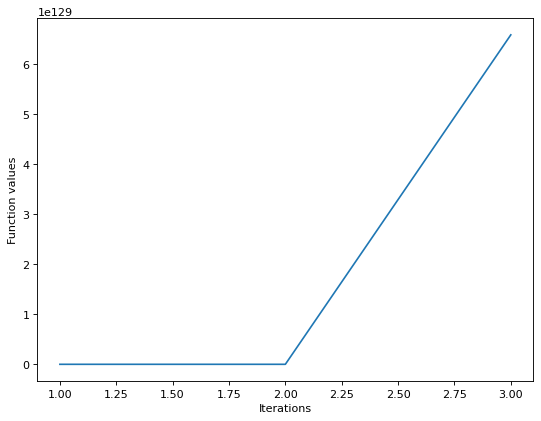

In [ ]:
# This section is for the f2 function

x = Symbol('x')
y = Symbol('y')

curX = 0                # The algorithm starts at x=0
curY = 0               # The algorithm starts at y=0
rate = 0.5              # Learning rate
precision = 0.0001      # This tells us when to stop the algorithm
maxIters = 10         # Maximum number of iterations
flag_precision = False  # If this flag is true then the loop stops at a certain precision       


first_function = (1-(y-3))**2 + 20*((x+3)-(y-3)**2)**2
function_values, loop_counter = gradient_descent_2Vars(first_function, curX, curY, rate, maxIters, precision, flag_precision, True)
print(function_values)

x = np.arange(1, loop_counter+1)
y = function_values
figure(figsize=(8, 6), dpi=80)
plt.plot(x, y)


# Add Axes Labels
plt.ylabel("Function values") 
plt.xlabel("Iterations") 

plt.show()

The observation is that the f2 function, with these values, is deviating. Thus we have to change the learning rate. We can undrestand this by the function values that are constantly increasing

##In the two code sections below I will change the iterations, the learning rate and the initial values, of x and y, of the f1 function

The local minimum occurs at 2.00000000000000 ,  3.00000000000000
The gradient descent of the function, needs 1 iteration to converge at a stationary point, with 0.5 learning rate.
Function value is 0
The local minimum occurs at 1.99669100591996 ,  2.99503650887995
The gradient descent of the function, needs 317 iterations to converge at a stationary point, with 0.01 learning rate.
Function value is 0.0000355856859205532
The local minimum occurs at 1.96672504555132 ,  2.95008756832698
The gradient descent of the function, needs 2046 iterations to converge at a stationary point, with 0.001 learning rate.
Function value is 0.00359847342907574
The local minimum occurs at 2.00003568119232 ,  3.00005352178848
The gradient descent of the function, needs 49 iterations to converge at a stationary point, with 0.9 learning rate.
Function value is 4.13772932695839E-9


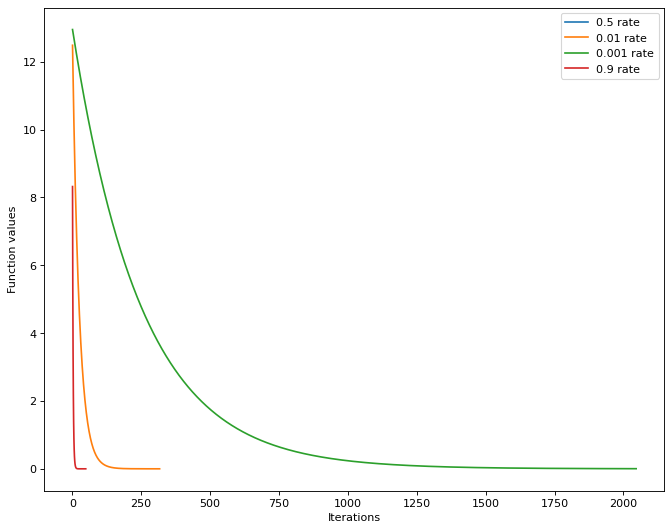

In [ ]:
x = Symbol('x')
y = Symbol('y')

curX = 0                # The algorithm starts at x=0
curY = 0               # The algorithm starts at y=0
rate = 0.5              # Learning rate
precision = 0.0001      # This tells us when to stop the algorithm
maxIters = 3000         # Maximum number of iterations
flag_precision = False  # If this flag is true then the loop stops at a certain precision       


first_function = (x-2)**2 + (y-3)**2
function_values, loop_counter = gradient_descent_2Vars(first_function, curX, curY, rate, maxIters, precision, True, False)
print(f"The gradient descent of the function, needs {loop_counter} iteration to converge at a stationary point, with 0.5 learning rate.")
print(f"Function value is {function_values[-1]}")
x = np.arange(1, loop_counter+1)
y = function_values

figure(figsize=(10, 8), dpi=80)
# plot lines
plt.plot(x, y, label = "0.5 rate")

# Change the learning rate to 0.01
rate = 0.01
flag_precision = True

x = Symbol('x')
y = Symbol('y')
function_values, loop_counter = gradient_descent_2Vars(first_function, curX, curY, rate, maxIters, precision, flag_precision, False)
print(f"The gradient descent of the function, needs {loop_counter} iterations to converge at a stationary point, with 0.01 learning rate.")
print(f"Function value is {function_values[-1]}")
x = np.arange(1, loop_counter+1)
y = function_values

plt.plot(x, y, label = "0.01 rate")

# Change the learning rate to 0.001
rate = 0.001
flag_precision = True
x = Symbol('x')
y = Symbol('y')
function_values, loop_counter = gradient_descent_2Vars(first_function, curX, curY, rate, maxIters, precision, flag_precision, False)
print(f"The gradient descent of the function, needs {loop_counter} iterations to converge at a stationary point, with 0.001 learning rate.")
print(f"Function value is {function_values[-1]}")
x = np.arange(1, loop_counter+1)
y = function_values

plt.plot(x, y, label = "0.001 rate")

# Change the learning rate to 0.9
rate = 0.9
flag_precision = True
x = Symbol('x')
y = Symbol('y')
function_values, loop_counter = gradient_descent_2Vars(first_function, curX, curY, rate, maxIters, precision, flag_precision, False)
print(f"The gradient descent of the function, needs {loop_counter} iterations to converge at a stationary point, with 0.9 learning rate.")
print(f"Function value is {function_values[-1]}")
x = np.arange(1, loop_counter+1)
y = function_values

plt.plot(x, y, label = "0.9 rate")

# Add Axes Labels
plt.ylabel("Function values") 
plt.xlabel("Iterations") 

plt.legend()
plt.show()

Lets observe what happens by changing the learning rate (initial values are 0 and iterations are 3000):


*   0.5 learning rate is the perfect one, making the function converge instantly. Thus it needs 1 iteration to converge

      
*   0.01 learning rate converges slower that the 0.5. It needs 317 iterations

* 0.001 learning rate is the slowest of them all. It needs 2046 iterations

* 0.9 learning rate is converging in 49 iterations which is pretty good



The local minimum occurs at 1.99669100591996 ,  2.99503650887995
The gradient descent of the function, needs 317 iteration to converge at a stationary point, with starting points x,y = (0,0).
Function value is 0.0000355856859205532
The local minimum occurs at 2.00491851149199 ,  3.00430369755549
The gradient descent of the function, needs 366 iterations to converge at a stationary point, with starting points x,y = (10,10).
Function value is 0.0000427135679459154
The local minimum occurs at 1.99501636748341 ,  3.00067087360800
The gradient descent of the function, needs 458 iterations to converge at a stationary point, with starting points x,y = (-50,10).
Function value is 0.0000252866644582914
The local minimum occurs at 2.00237761695971 ,  2.99507493629774
The gradient descent of the function, needs 526 iterations to converge at a stationary point, with starting points x,y = (100,-200).
Function value is 0.0000299093148783847


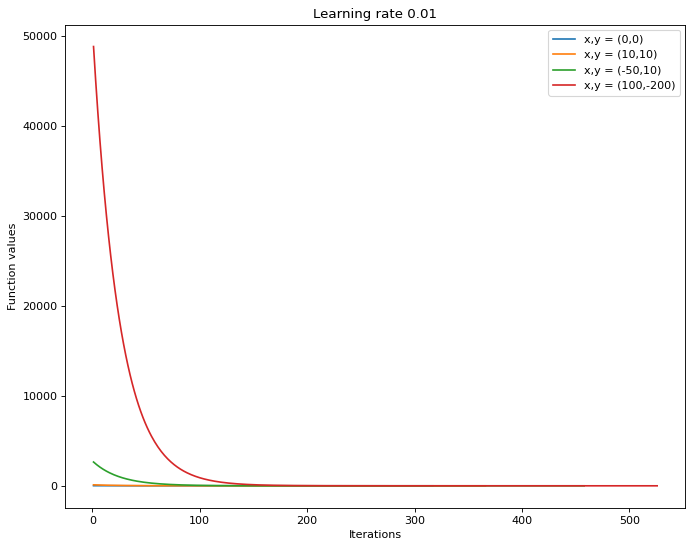

In [ ]:
x = Symbol('x')
y = Symbol('y')

curX = 0                # The algorithm starts at x=0
curY = 0               # The algorithm starts at y=0
rate = 0.01              # Learning rate
precision = 0.0001      # This tells us when to stop the algorithm
maxIters = 1000         # Maximum number of iterations
flag_precision = True  # If this flag is true then the loop stops at a certain precision       


first_function = (x-2)**2 + (y-3)**2
function_values, loop_counter = gradient_descent_2Vars(first_function, curX, curY, rate, maxIters, precision, flag_precision, False)
print(f"The gradient descent of the function, needs {loop_counter} iteration to converge at a stationary point, with starting points x,y = (0,0).")
print(f"Function value is {function_values[-1]}")
x = np.arange(1, loop_counter+1)
y = function_values

figure(figsize=(10, 8), dpi=80)
# plot lines
plt.plot(x, y, label = "x,y = (0,0)")

# Change the initial values
curX = 10                # The algorithm starts at x=10
curY = 10               # The algorithm starts at y=10

x = Symbol('x')
y = Symbol('y')
function_values, loop_counter = gradient_descent_2Vars(first_function, curX, curY, rate, maxIters, precision, flag_precision, False)
print(f"The gradient descent of the function, needs {loop_counter} iterations to converge at a stationary point, with starting points x,y = (10,10).")
print(f"Function value is {function_values[-1]}")
x = np.arange(1, loop_counter+1)
y = function_values

plt.plot(x, y, label = "x,y = (10,10)")

# Change the initial values
curX = -50                # The algorithm starts at x=-50
curY = 10               # The algorithm starts at y=10
x = Symbol('x')
y = Symbol('y')
function_values, loop_counter = gradient_descent_2Vars(first_function, curX, curY, rate, maxIters, precision, flag_precision, False)
print(f"The gradient descent of the function, needs {loop_counter} iterations to converge at a stationary point, with starting points x,y = (-50,10).")
print(f"Function value is {function_values[-1]}")
x = np.arange(1, loop_counter+1)
y = function_values

plt.plot(x, y, label = "x,y = (-50,10)")

# Change the initial values
curX = 100                # The algorithm starts at x=100
curY = -200               # The algorithm starts at y=-200
x = Symbol('x')
y = Symbol('y')
function_values, loop_counter = gradient_descent_2Vars(first_function, curX, curY, rate, maxIters, precision, flag_precision, False)
print(f"The gradient descent of the function, needs {loop_counter} iterations to converge at a stationary point, with starting points x,y = (100,-200).")
print(f"Function value is {function_values[-1]}")
x = np.arange(1, loop_counter+1)
y = function_values

plt.plot(x, y, label = "x,y = (100,-200)")

# Add Axes Labels
plt.ylabel("Function values") 
plt.xlabel("Iterations") 
plt.title('Learning rate 0.01')
plt.legend()
plt.show()

##In the two code sections below I will change the iterations, the learning rate and the initial values, of x and y, of the f2 function

The local minimum occurs at -2.22148763410111 ,  3.88374845745739
The gradient descent of the function, needs 5004 iterations to converge at a stationary point, with 0.001 learning rate.
Function value is 0.0136393181806905
The local minimum occurs at -2.26877802869924 ,  3.85694013351486
The gradient descent of the function, needs 5758 iterations to converge at a stationary point, with 0.0008 learning rate.
Function value is 0.0206613655464111
The local minimum occurs at 0.239622265506832 ,  1.20853079257622
The gradient descent of the function, needs 131 iterations to converge at a stationary point, with 0.00008 learning rate.
Function value is 7.81061410480994


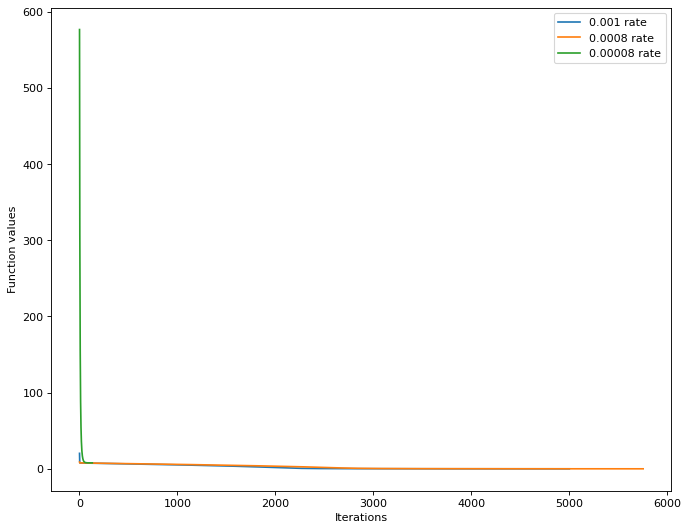

In [ ]:
x = Symbol('x')
y = Symbol('y')

curX = 0                # The algorithm starts at x=0
curY = 0               # The algorithm starts at y=0
rate = 0.001              # Learning rate
precision = 0.0001      # This tells us when to stop the algorithm
maxIters = 10000         # Maximum number of iterations
flag_precision = True  # If this flag is true then the loop stops at a certain precision       

first_function = (1-(y-3))**2 + 20*((x+3)-(y-3)**2)**2
function_values, loop_counter = gradient_descent_2Vars(first_function, curX, curY, rate, maxIters, precision, flag_precision, False)
print(f"The gradient descent of the function, needs {loop_counter} iterations to converge at a stationary point, with 0.001 learning rate.")
print(f"Function value is {function_values[-1]}")
x = np.arange(1, loop_counter+1)
y = function_values

figure(figsize=(10, 8), dpi=80)
# plot lines
plt.plot(x, y, label = "0.001 rate")


# Change the learning rate to 0.0008
rate = 0.0008
x = Symbol('x')
y = Symbol('y')
function_values, loop_counter = gradient_descent_2Vars(first_function, curX, curY, rate, maxIters, precision, flag_precision, False)
print(f"The gradient descent of the function, needs {loop_counter} iterations to converge at a stationary point, with 0.0008 learning rate.")
print(f"Function value is {function_values[-1]}")
x = np.arange(1, loop_counter+1)
y = function_values

plt.plot(x, y, label = "0.0008 rate")

# Change the learning rate to 0.00008
rate = 0.00008
x = Symbol('x')
y = Symbol('y')
function_values, loop_counter = gradient_descent_2Vars(first_function, curX, curY, rate, maxIters, precision, flag_precision, False)
print(f"The gradient descent of the function, needs {loop_counter} iterations to converge at a stationary point, with 0.00008 learning rate.")
print(f"Function value is {function_values[-1]}")
x = np.arange(1, loop_counter+1)
y = function_values

plt.plot(x, y, label = "0.00008 rate")

# Add Axes Labels
plt.ylabel("Function values") 
plt.xlabel("Iterations") 

plt.legend()
plt.show()

As we saw above learning rate=0.5 is not converging so I had to make some experiments to find a suitable learning rate. Lets observe what happens by changing the learning rate (initial values are 0 and iterations are 1000):


*   0.001  learning rate converges at 5004 iterations

      
*   0.0008  learning rate converges at 5758 iterations

* 0.00008  learning rate is the best one yet. It converges at 131 iterations. So is it the best learning rate? The answer is no, because as we can see from the prints, the function value is 7.81061410480994 and not 0. This is the local minima problem. That means that I fount a local stationary point and not the global.


The local minimum occurs at -2.22148763410111 ,  3.88374845745739
The gradient descent of the function, needs 5004 iterations to converge at a stationary point, with x,y = (0,0).
Function value is 0.0136393181806905
The local minimum occurs at -2 ,  4
The gradient descent of the function, needs 0 iterations to converge at a stationary point, with x,y = (-2,4).
The local minimum occurs at -2.22148173869878 ,  3.88375175008835
The gradient descent of the function, needs 4944 iterations to converge at a stationary point, with x,y = (-1,-2).
Function value is 0.0136385450802652


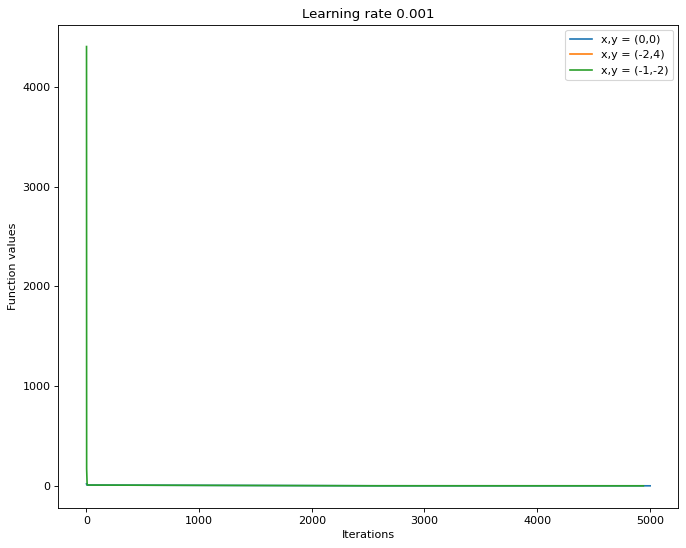

In [ ]:
x = Symbol('x')
y = Symbol('y')

curX = 0                # The algorithm starts at x=0
curY = 0               # The algorithm starts at y=0
rate = 0.001              # Learning rate
precision = 0.0001      # This tells us when to stop the algorithm
maxIters = 10000         # Maximum number of iterations
flag_precision = True  # If this flag is true then the loop stops at a certain precision       

first_function = (1-(y-3))**2 + 20*((x+3)-(y-3)**2)**2
function_values, loop_counter = gradient_descent_2Vars(first_function, curX, curY, rate, maxIters, precision, flag_precision, False)
print(f"The gradient descent of the function, needs {loop_counter} iterations to converge at a stationary point, with x,y = (0,0).")
print(f"Function value is {function_values[-1]}")
x = np.arange(1, loop_counter+1)
y = function_values

figure(figsize=(10, 8), dpi=80)
# plot lines
plt.plot(x, y, label = "x,y = (0,0)")


# CChange the initial values
curX = -2                # The algorithm starts at x=0
curY = 4               # The algorithm starts at y=0
x = Symbol('x')
y = Symbol('y')
function_values, loop_counter = gradient_descent_2Vars(first_function, curX, curY, rate, maxIters, precision, flag_precision, False)
print(f"The gradient descent of the function, needs {loop_counter} iterations to converge at a stationary point, with x,y = (-2,4).")
x = np.arange(1, loop_counter+1)
y = function_values

plt.plot(x, y, label = "x,y = (-2,4)")

# Change the initial values
curX = -1                # The algorithm starts at x=0
curY = -2               # The algorithm starts at y=0
x = Symbol('x')
y = Symbol('y')
function_values, loop_counter = gradient_descent_2Vars(first_function, curX, curY, rate, maxIters, precision, flag_precision, False)
print(f"The gradient descent of the function, needs {loop_counter} iterations to converge at a stationary point, with x,y = (-1,-2).")
print(f"Function value is {function_values[-1]}")
x = np.arange(1, loop_counter+1)
y = function_values

plt.plot(x, y, label = "x,y = (-1,-2)")

# Add Axes Labels
plt.ylabel("Function values") 
plt.xlabel("Iterations") 
plt.title('Learning rate 0.001')
plt.legend()
plt.show()

Above I changed the initial values while keeping the learning rate at 0.001. As we can understant with the initial values -2, 4 f2 converges instantly. 

Below the redish function is f1 and the blue one is f2. As we observe f2 has a lot of local minimums. That is why we've found 1 of them with the learning rate 0.00008

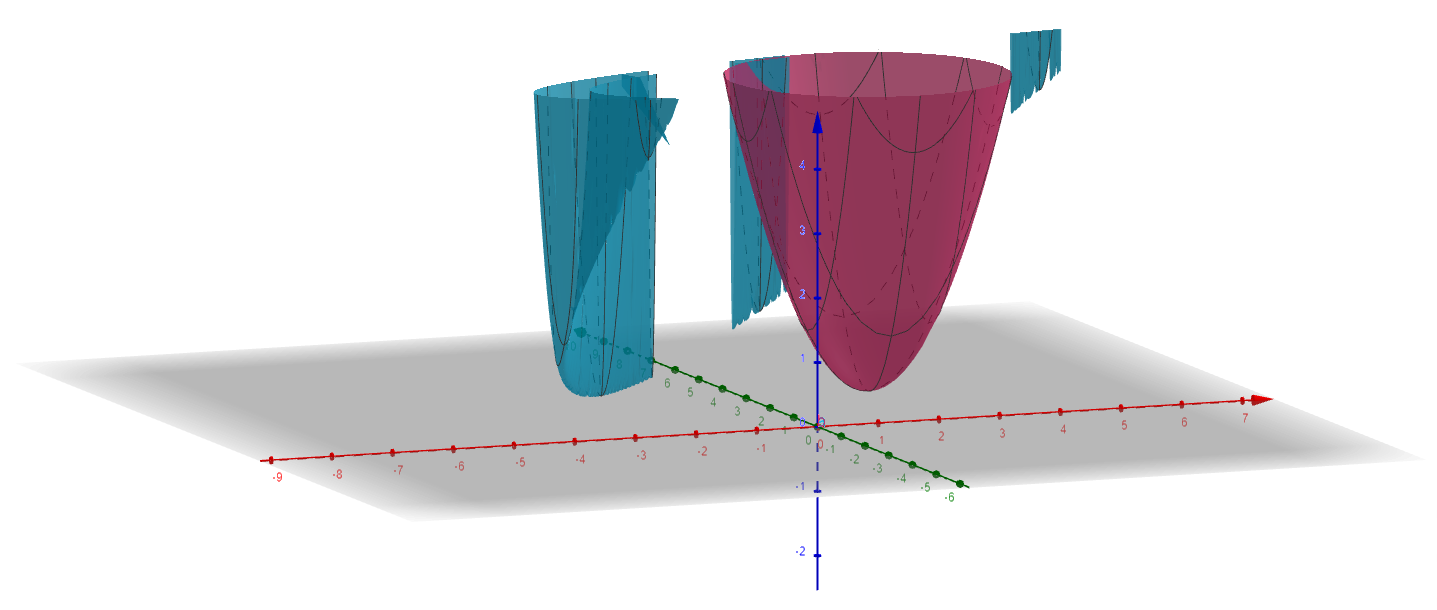

#Summary

##Some observations on learning rates

As we saw from the experiments the bigger the learning rate does not mean the faster the convergence all of the times (in the f1 function the 0.5 converged faster that 0.9). Also as we observed in the f2 function learning rates above 0.001 didn't converge. 

Most of the times small learning rates are slower but they are safer than very big ones. But there is something tricky here, with small learning rates there is a big possibility that we'll have a local minima problem. So there is not such thing as perfect learning rate. Each problems need a different approach. As we observed for f1 the best learning rate value is 0.5 and for f2 0.001.